In [1]:
#load all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load both datasets
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

#Data Cleaning

Handling missing values

In [3]:
#get info from test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   154 non-null    int64  
 1   no_times_pregnant      154 non-null    int64  
 2   glucose_concentration  154 non-null    int64  
 3   blood_pressure         154 non-null    int64  
 4   skin_fold_thickness    154 non-null    int64  
 5   serum_insulin          154 non-null    int64  
 6   bmi                    154 non-null    float64
 7   diabetes pedigree      154 non-null    float64
 8   age                    154 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 11.0 KB


In [4]:
#get top 5 entries
test.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,437,12,140,85,33,0,37.4,0.244,41
1,411,6,102,90,39,0,35.7,0.674,28
2,639,7,97,76,32,91,40.9,0.871,32
3,213,7,179,95,31,0,34.2,0.164,60
4,181,6,87,80,0,0,23.2,0.084,32


- test.csv does not have target labels, therefore, train.csv will be used as training and testing before predicting the class of test.csv 
- the data types in test.csv are correct and no null values

In [5]:
#get info from train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   614 non-null    int64  
 1   no_times_pregnant      614 non-null    int64  
 2   glucose_concentration  614 non-null    int64  
 3   blood_pressure         614 non-null    int64  
 4   skin_fold_thickness    614 non-null    int64  
 5   serum_insulin          614 non-null    int64  
 6   bmi                    614 non-null    float64
 7   diabetes pedigree      614 non-null    float64
 8   age                    614 non-null    int64  
 9   diabetes               614 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 48.1 KB


No missing values, all in correct data types

In [6]:
#get top 5 entries
train.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0
1,25,11,143,94,33,146,36.6,0.254,51,1
2,710,2,93,64,32,160,38.0,0.674,23,1
3,658,1,120,80,48,200,38.9,1.162,41,0
4,542,3,128,72,25,190,32.4,0.549,27,1


- the data types in train.csv are correct and no null values

Handling outliers

In [7]:
import statistics
# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    # Set upper and lower limit to 3 standard deviation
    random_data_std = statistics.stdev(data)
    random_data_mean = statistics.mean(data)
    # 3-standard deviation
    
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    
    # Generate outliers
    for outlier in data:
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
    return anomalies

In [8]:
for i,j in train.items():
    print('Column Name : ', i)
    print('No of outliers : ', len(find_anomalies(train[i])))
    print('Outliers % : ', round(len(find_anomalies(train[i]))/train.shape[0]*100,2))

Column Name :  p_id
No of outliers :  0
Outliers % :  0.0
Column Name :  no_times_pregnant
No of outliers :  3
Outliers % :  0.49
Column Name :  glucose_concentration
No of outliers :  4
Outliers % :  0.65
Column Name :  blood_pressure
No of outliers :  31
Outliers % :  5.05
Column Name :  skin_fold_thickness
No of outliers :  0
Outliers % :  0.0
Column Name :  serum_insulin
No of outliers :  16
Outliers % :  2.61
Column Name :  bmi
No of outliers :  12
Outliers % :  1.95
Column Name :  diabetes pedigree
No of outliers :  10
Outliers % :  1.63
Column Name :  age
No of outliers :  3
Outliers % :  0.49
Column Name :  diabetes
No of outliers :  0
Outliers % :  0.0


In [9]:
#use IQR to find where the outliers are located
for i,j in train.items():
    Q1 = np.percentile(train[i], 25, method='midpoint')
    Q3 = np.percentile(train[i], 75, method='midpoint')
    IQR = Q3 - Q1
    print('Column Name : ', i)
    # Above Upper bound
    upper=Q3+1.5*IQR
    upper_array=np.array(train[i]>=upper)
    print("Upper Bound:",upper)
    print('No of outliers : ',upper_array.sum())

    #Below Lower bound
    lower=Q1-1.5*IQR
    lower_array=np.array(train[i]<=lower)
    print("Lower Bound:",lower)
    print('No of outliers : ',lower_array.sum())

Column Name :  p_id
Upper Bound: 1144.0
No of outliers :  0
Lower Bound: -380.0
No of outliers :  0
Column Name :  no_times_pregnant
Upper Bound: 13.5
No of outliers :  3
Lower Bound: -6.5
No of outliers :  0
Column Name :  glucose_concentration
Upper Bound: 199.0
No of outliers :  0
Lower Bound: 39.0
No of outliers :  4
Column Name :  blood_pressure
Upper Bound: 107.0
No of outliers :  4
Lower Bound: 35.0
No of outliers :  34
Column Name :  skin_fold_thickness
Upper Bound: 80.0
No of outliers :  0
Lower Bound: -48.0
No of outliers :  0
Column Name :  serum_insulin
Upper Bound: 315.0
No of outliers :  27
Lower Bound: -189.0
No of outliers :  0
Column Name :  bmi
Upper Bound: 50.550000000000004
No of outliers :  6
Lower Bound: 13.35
No of outliers :  10
Column Name :  diabetes pedigree
Upper Bound: 1.1717499999999998
No of outliers :  26
Lower Bound: -0.31825
No of outliers :  0
Column Name :  age
Upper Bound: 66.5
No of outliers :  9
Lower Bound: -1.5
No of outliers :  0
Column Name : 

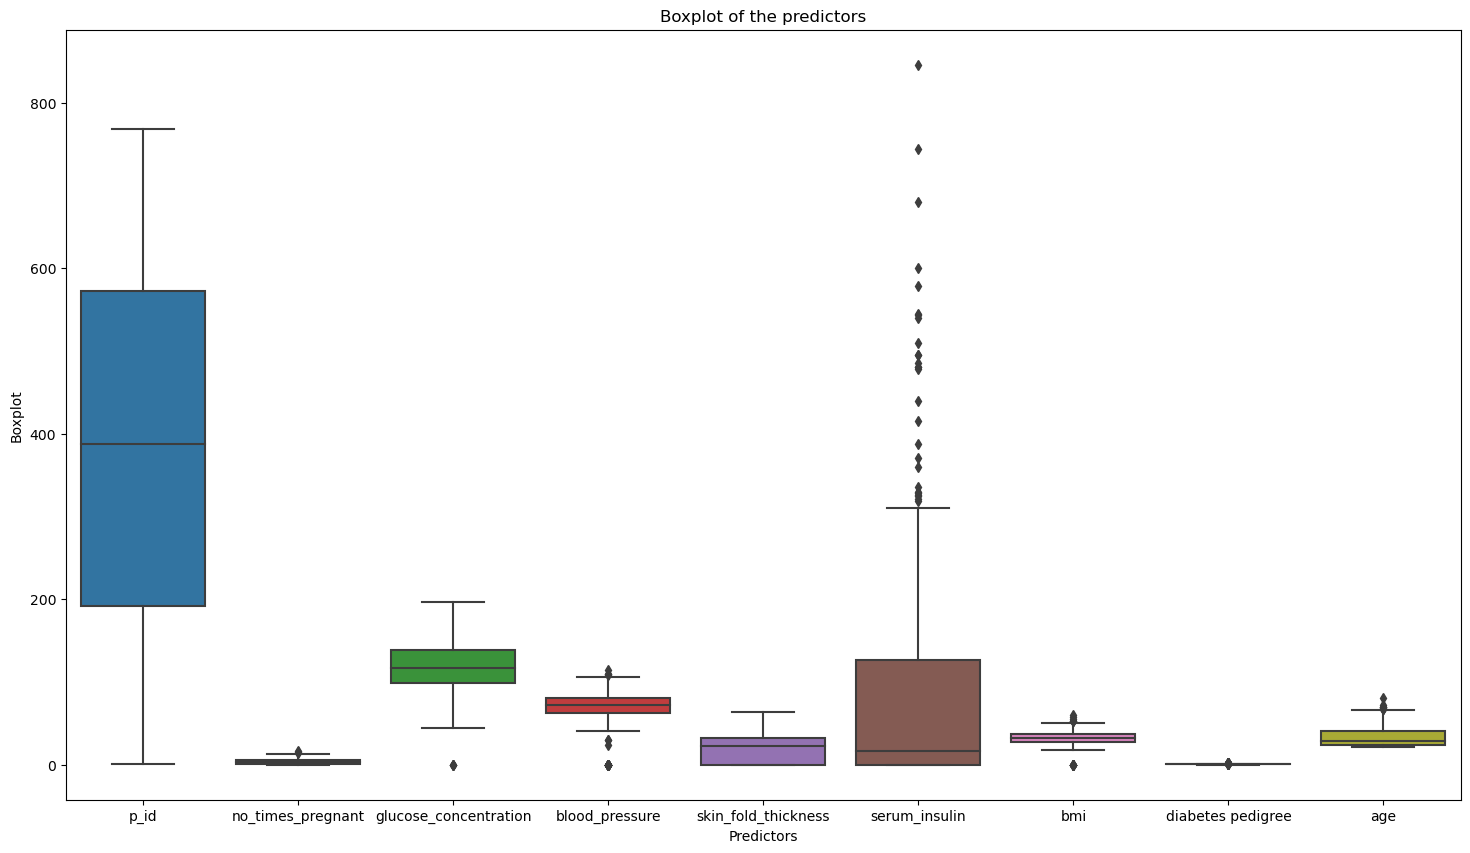

In [10]:
#visualize outliers using box plot
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(18, 10))
sns.boxplot(data=train.drop(columns=['diabetes']),ax=ax)
plt.xlabel("Predictors")
plt.ylabel("Boxplot")
plt.title("Boxplot of the predictors");

Eventhough there are outliers, since we are using Machine Learning, we can keep it as it is.

#Data Exploration

Numerical Analysis

In [11]:
train.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,385.773616,3.853420,120.542345,68.765472,20.244300,79.355049,31.909935,0.466342,33.325733,0.348534
std,223.603024,3.358126,31.252286,19.914836,15.886083,117.709950,8.007699,0.331090,11.929569,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,191.250000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,387.000000,3.000000,117.000000,72.000000,23.000000,17.000000,32.000000,0.361000,29.000000,0.000000
75%,572.750000,6.000000,139.000000,80.000000,32.000000,126.000000,36.600000,0.613500,41.000000,1.000000
max,768.000000,17.000000,197.000000,114.000000,63.000000,846.000000,59.400000,2.420000,81.000000,1.000000


[Text(0, 0, '1.000'),
 Text(0, 0, '0.469'),
 Text(0, 0, '0.275'),
 Text(0, 0, '0.222'),
 Text(0, 0, '0.209'),
 Text(0, 0, '0.173'),
 Text(0, 0, '0.117'),
 Text(0, 0, '0.072'),
 Text(0, 0, '0.053'),
 Text(0, 0, '-0.071')]

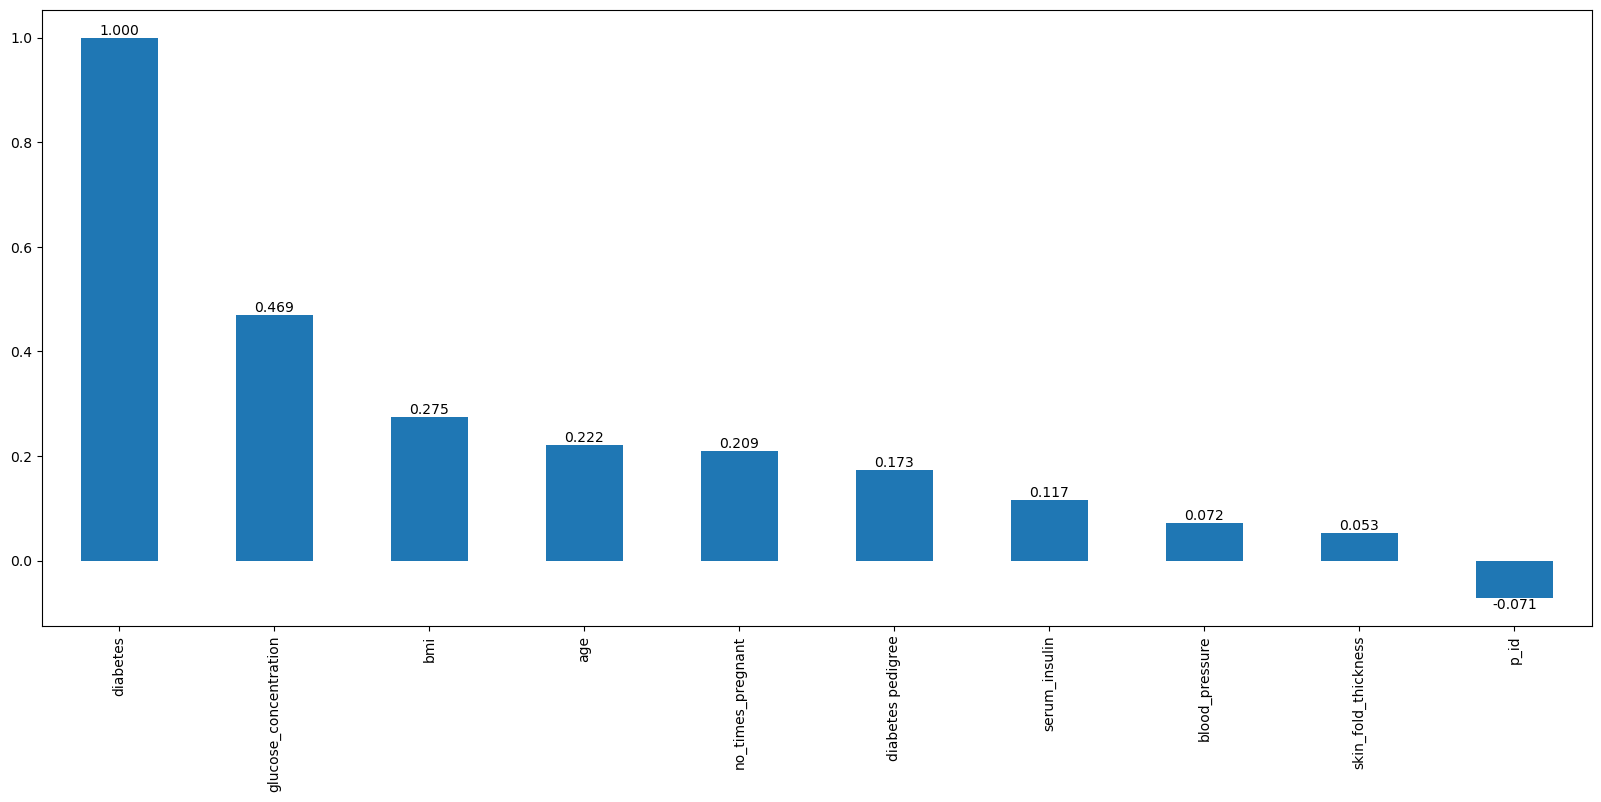

In [12]:
#check the correlation between columns and target variable
plt.figure(figsize=(20,8))
ax=train.corr()['diabetes'].sort_values(ascending=False).plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='{:,.3f}')

- Glucose concentration is positively moderate linear correlated with diabetes, followed by BMI 
- The others have weak correlations but it might be significant in medical field

In [13]:
#check the correlation between columns
train.corr()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
p_id,1.000000,-0.034607,-0.001407,0.027835,0.008890,0.011636,-0.003948,-0.052759,0.020156,-0.071237
no_times_pregnant,-0.034607,1.000000,0.123416,0.140526,-0.085653,-0.091123,-0.004101,-0.005811,0.534231,0.209196
glucose_concentration,-0.001407,0.123416,1.000000,0.160167,0.043053,0.330860,0.222449,0.131274,0.241590,0.469336
blood_pressure,0.027835,0.140526,0.160167,1.000000,0.214275,0.088827,0.296000,0.042320,0.236387,0.072003
skin_fold_thickness,0.008890,-0.085653,0.043053,0.214275,1.000000,0.439886,0.413288,0.187470,-0.144741,0.052695
serum_insulin,0.011636,-0.091123,0.330860,0.088827,0.439886,1.000000,0.200914,0.176183,-0.052863,0.116562
bmi,-0.003948,-0.004101,0.222449,0.296000,0.413288,0.200914,1.000000,0.116301,0.025209,0.275263
diabetes pedigree,-0.052759,-0.005811,0.131274,0.042320,0.187470,0.176183,0.116301,1.000000,0.053637,0.173301
age,0.020156,0.534231,0.241590,0.236387,-0.144741,-0.052863,0.025209,0.053637,1.000000,0.221736
diabetes,-0.071237,0.209196,0.469336,0.072003,0.052695,0.116562,0.275263,0.173301,0.221736,1.000000


<Axes: >

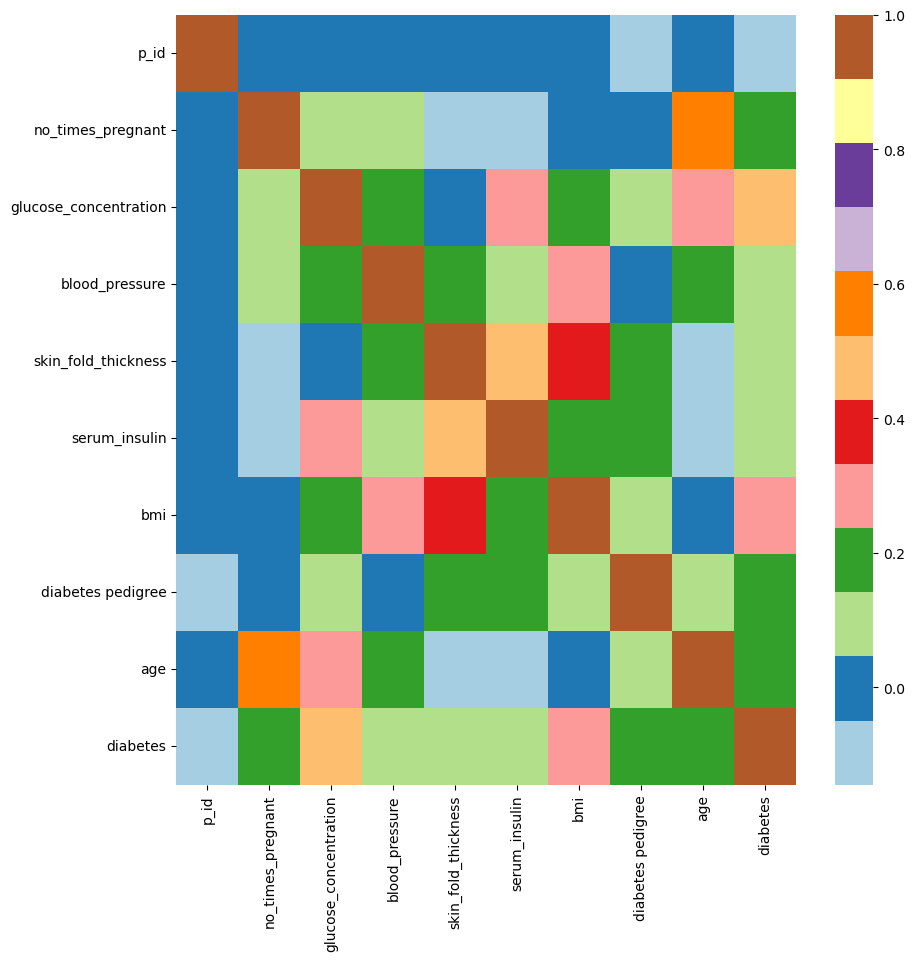

In [14]:
#check the correlation between columns using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), cmap='Paired')

- age and no_times_pregnant are moderately correlated
- glucose_concentration is moderately correlated with diabetes, age, serum_insulin
- bmi is moderately correlated with diabetes, blood_pressure, skin_fold_thickness
- serum_insulin and skin_fold_thickness are moderately correlated

In [15]:
#check the skewness
#negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed
#positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed
#zero is the assymmetric distribution
train.skew()

p_id                    -0.001023
no_times_pregnant        0.906273
glucose_concentration    0.120295
blood_pressure          -1.877868
skin_fold_thickness      0.014201
serum_insulin            2.394700
bmi                     -0.539151
diabetes pedigree        1.978319
age                      1.143901
diabetes                 0.637293
dtype: float64

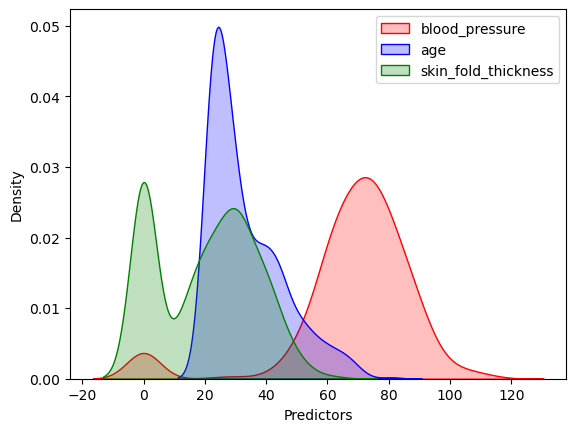

In [16]:
#visualize the skewness of the selected columns
ax = sns.kdeplot(train.blood_pressure,color="Red", fill=True)
ax = sns.kdeplot(train.age,color="Blue", fill=True)
ax = sns.kdeplot(train.skin_fold_thickness,color="Green", fill=True)
ax.set_xlabel("Predictors")
ax.set_ylabel("Density")
ax.legend(["blood_pressure","age","skin_fold_thickness"],loc='upper right')

- skin_fold_thickness (green) almost has asymmetrical distribution
- age (blue) is right skewed
- blood_pressure (red) is left skewed

Univariate Analysis

In [17]:
#let's check the distribution of target variable
train.diabetes.value_counts()/len(train)*100

0    65.14658
1    34.85342
Name: diabetes, dtype: float64

Text(0, 0.5, 'Count of Diabetes')

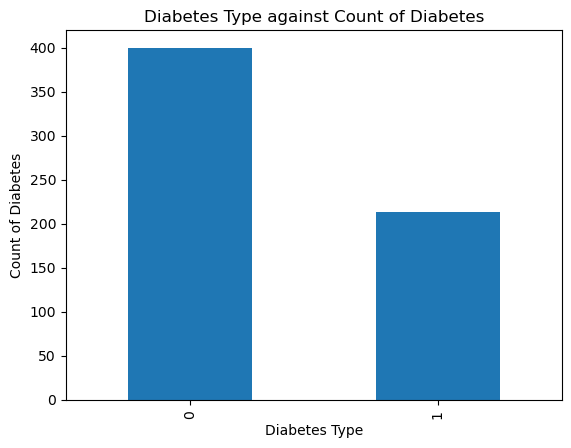

In [18]:
#visualize the distribution
ax=train.diabetes.value_counts().plot(kind='bar',title='Diabetes Type against Count of Diabetes')
ax.set_xlabel("Diabetes Type")
ax.set_ylabel("Count of Diabetes")

In [19]:
#drop patient id column because unnecessary
train=train.drop(['p_id'], axis=1)
test=test.drop(['p_id'], axis=1)

Feature Binning to get insights

In [20]:
train_copy=train.copy()

In [21]:
#binning for the rest
for i,j in train_copy.drop(columns=['diabetes','age','skin_fold_thickness','bmi','diabetes pedigree','no_times_pregnant','serum_insulin','glucose_concentration']).items():
    cut_bins = np.arange(train_copy[i].min(),train_copy[i].max(), 10)
    # Create a new column grouping column data into generations
    s= i + '_bins'
    train_copy[s] = pd.cut(train_copy[i], bins=cut_bins)

In [22]:
#skin_fold_thickness binning
cut_bins = np.arange(train_copy.skin_fold_thickness.min(),train_copy.skin_fold_thickness.max(), 5)
# Create a new column grouping birth_year into generations
train_copy['skin_fold_thickness_bins'] = pd.cut(train_copy['skin_fold_thickness'], bins=cut_bins)

In [23]:
#skin_fold_thickness binning
cut_bins = np.arange(train_copy.age.min(),train_copy.age.max(), 5)
# Create a new column grouping birth_year into generations
train_copy['age_bins'] = pd.cut(train_copy['age'], bins=cut_bins)

In [24]:
#bmi binning
cut_bins = np.arange(train_copy.bmi.min(),train_copy.bmi.max(), 5)
# Create a new column grouping column data into generations
train_copy['bmi_bins'] = pd.cut(train_copy['bmi'], bins=cut_bins)

In [25]:
#blood_pressure binning
cut_bins = np.arange(train_copy.serum_insulin.min(),train_copy.serum_insulin.max(), 100)
# Create a new column grouping column data into generations
train_copy['serum_insulin_bins'] = pd.cut(train_copy['serum_insulin'], bins=cut_bins)

In [26]:
#glucose concentration binning
cut_bins = np.arange(train_copy.glucose_concentration.min(),train_copy.glucose_concentration.max(), 20)
# Create a new column grouping column data into generations
train_copy['glucose_concentration_bins'] = pd.cut(train_copy['glucose_concentration'], bins=cut_bins)

In [27]:
#bmi binning
cut_bins = np.arange(train_copy['diabetes pedigree'].min(),train_copy['diabetes pedigree'].max(), 0.2)
# Create a new column grouping column data into generations
train_copy['diabetes_pedigree_bins'] = pd.cut(train_copy['diabetes pedigree'], bins=cut_bins)

In [28]:
train.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,2,112,68,22,94,34.1,0.315,26,0
1,11,143,94,33,146,36.6,0.254,51,1
2,2,93,64,32,160,38.0,0.674,23,1
3,1,120,80,48,200,38.9,1.162,41,0
4,3,128,72,25,190,32.4,0.549,27,1


<Axes: >

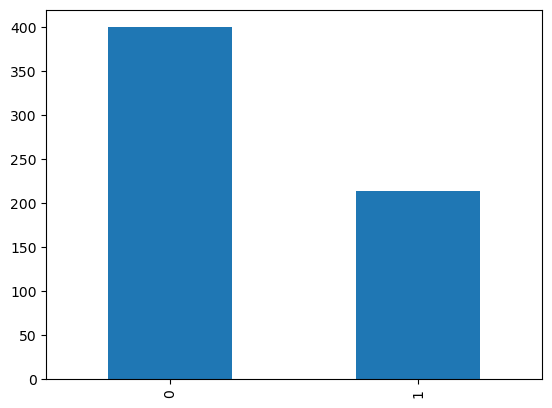

In [29]:
train_copy.diabetes.value_counts().plot(kind='bar')

<Figure size 640x480 with 0 Axes>

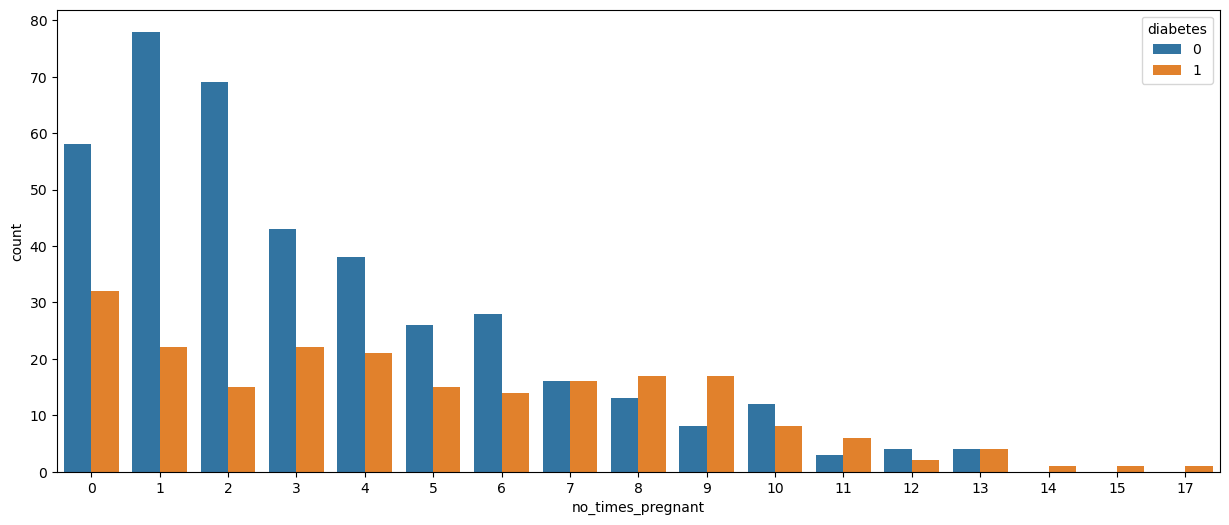

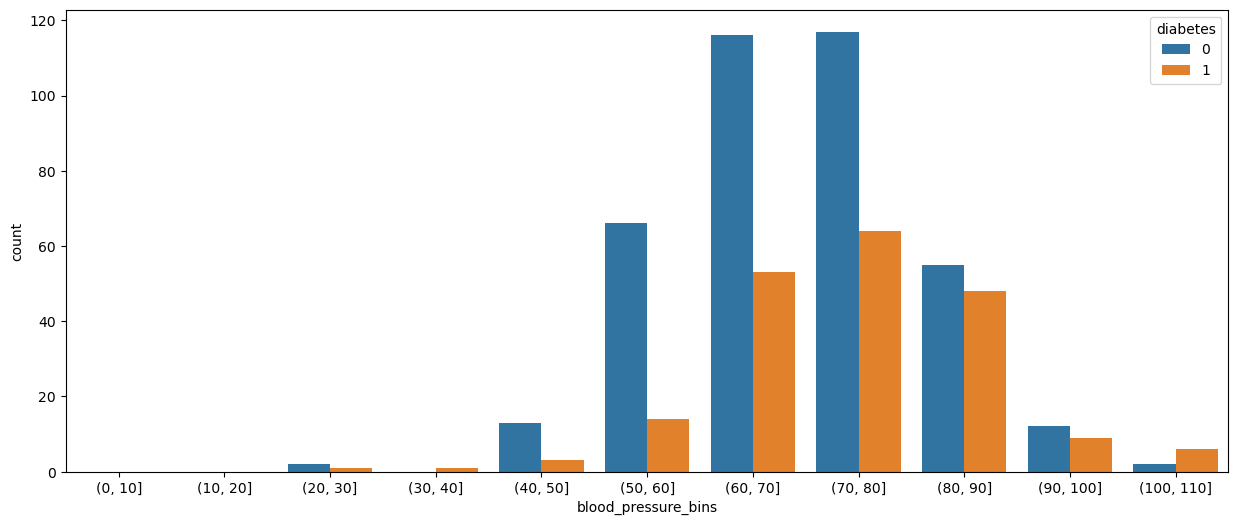

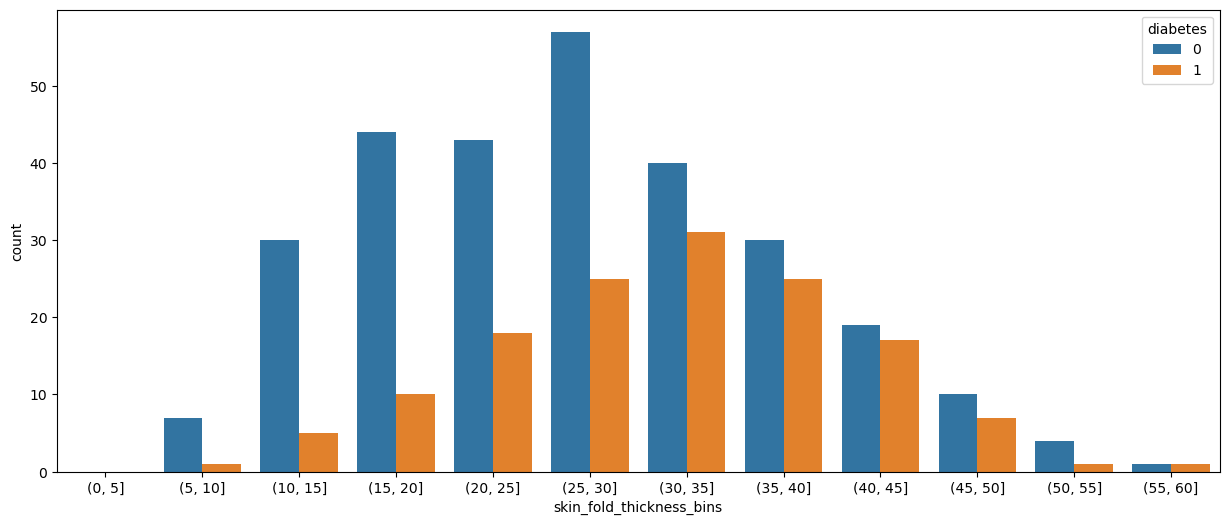

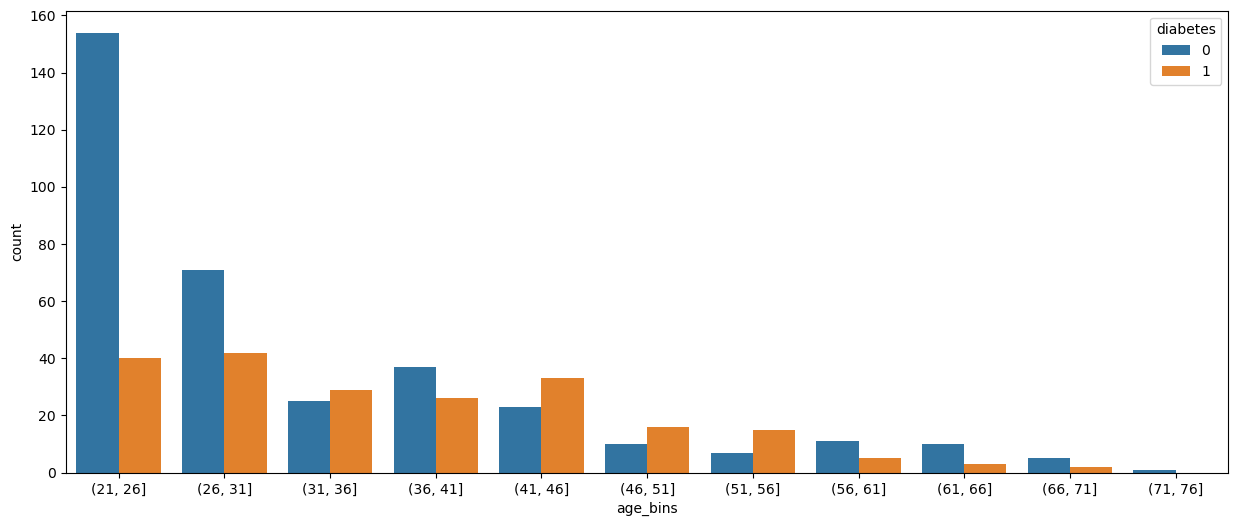

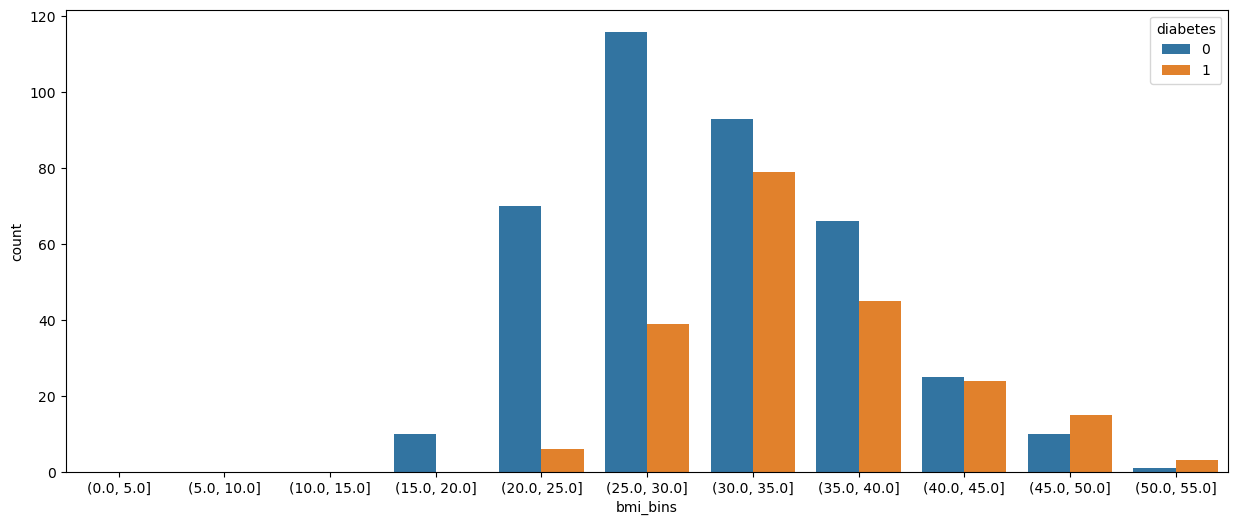

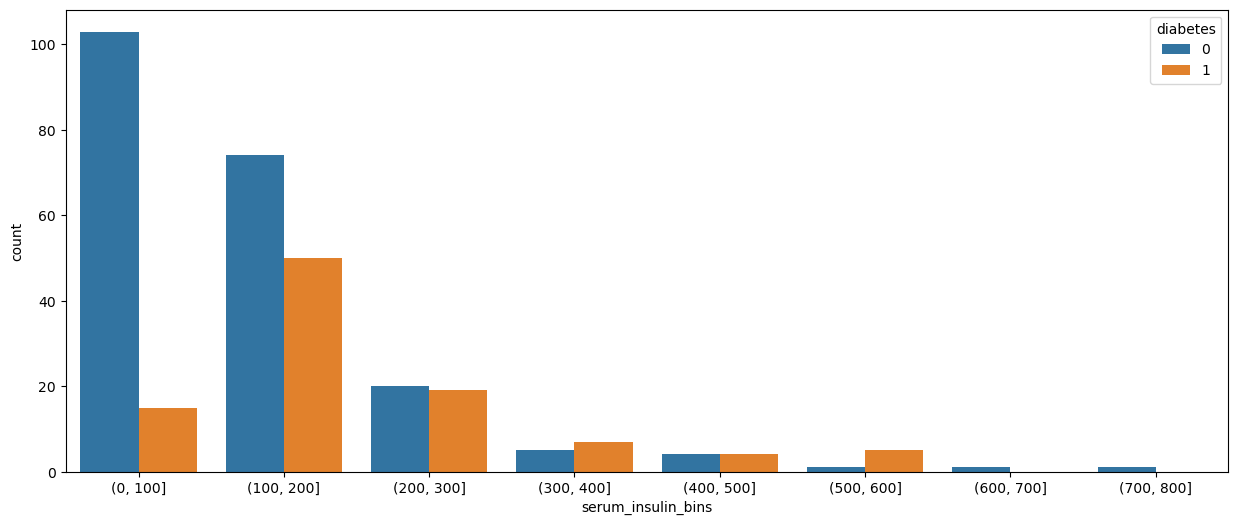

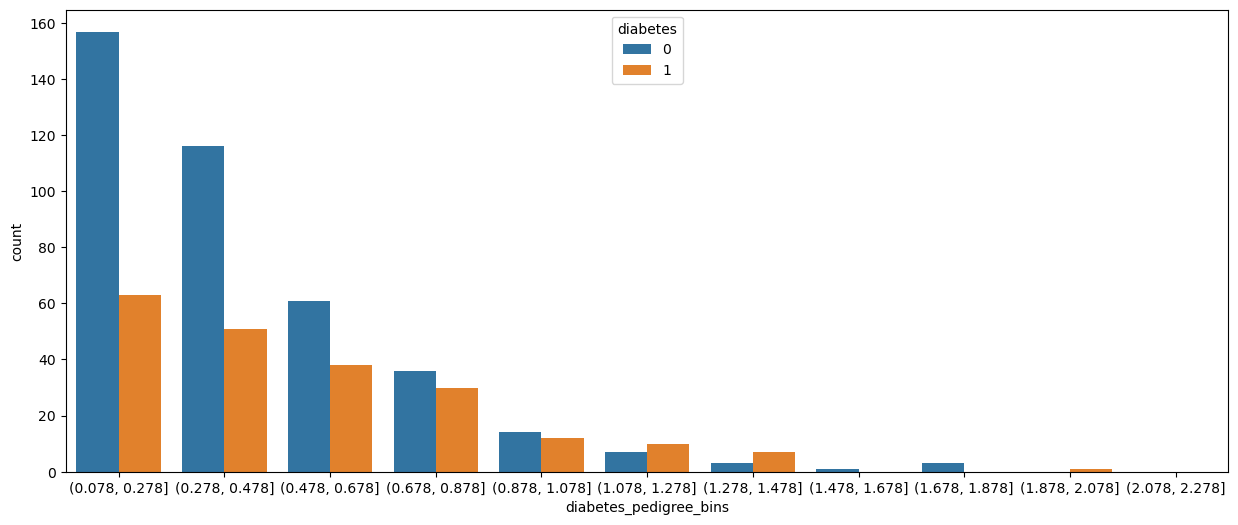

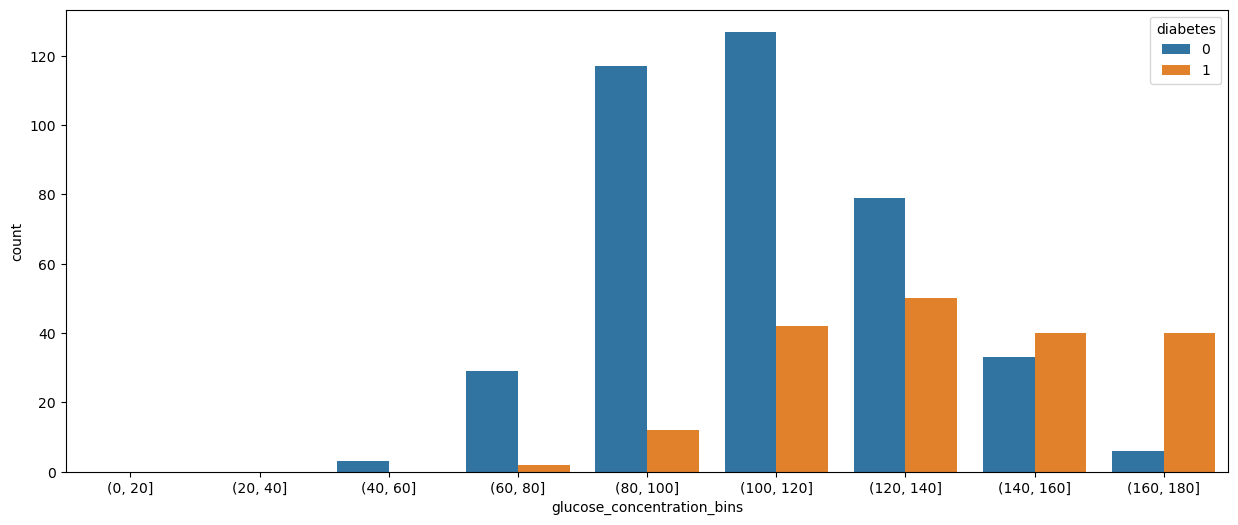

In [30]:
for i, predictor in enumerate(train_copy.drop(columns=['diabetes','glucose_concentration', 'blood_pressure',
       'skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree',
       'age'])):
    fig, ax = plt.subplots(figsize=(15, 6))
    plt.figure(i)
    sns.countplot(data=train_copy, x=predictor, hue='diabetes',ax=ax)

Insights:
- no_times_pregnant : the no of diabetic person significantly increased when the no reaches 7 but it started to gradually increases at 3
- glucose_concentration : the no of diabetic person gradually increased against non-diabetic when it reaches glucose concentration range of 120-140 and significantly at 140-180
- blood_pressure : the no of diabetic person gradually increased against non-diabetic when it reaches blood pressure range of 60-70 and significantly at 80-90
- skin_fold_thickness : the no of diabetic person gradually increased against non-diabetic when it reaches skin fold thickness range of 20-25 and significantly at 30-35
- serum_insulin : the no of diabetic person significantly increased against non-diabetic when the serum insulin range is at 100-200
- bmi : the no of diabetic person significantly increased against non-diabetic when the bmi range is at 30-35
- diabetes pedigree : the no of diabetic person gradually increased against non-diabetic when it reaches diabetes pedigree range of 0.278-0.478 and significantly at 0.678-0.878 
- age :  the no of diabetic person gradually increased against non-diabetic when it reaches age range of 26-31 and significantly at 31-36 

#Predictive Analysis

In [31]:
#assign X, y
X = train.drop(['diabetes'], axis=1)
y = train['diabetes']

In [32]:
X.head()

,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age
0,2,112,68,22,94,34.1,0.315,26
1,11,143,94,33,146,36.6,0.254,51
2,2,93,64,32,160,38.0,0.674,23
3,1,120,80,48,200,38.9,1.162,41
4,3,128,72,25,190,32.4,0.549,27


Feature Encoding

In [33]:
#train.columns

In [34]:
#train = pd.get_dummies(train, columns=['no_times_pregnant', 'glucose_concentration', 'blood_pressure','skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree','age'], drop_first=True)

In [35]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])], remainder='passthrough')
#X = np.array(ct.fit_transform(X))

Feature Encoding cannot be done because
- LabelEncoding is unncessary as y is already in binary values
- OneHotEncoding cannot be done on X because the column length will be different from the data that we want to predict, test.csv. If we ignore class prediction of test.csv, then we can proceed with Feature Encoding

Feature Scaling

Data standardization Notes:
- Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1
- The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.
- we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model
- Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data.
- If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.

In [36]:
#define model, transform data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
#Data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
# we cannot use the fit() method on the test dataset, because it will be the wrong approach as it could introduce bias to the testing dataset
X_test_sc = sc.transform(X_test)

KNN Classifier Model

In [37]:
# Call the kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Initiating the classifier
model_knn = KNeighborsClassifier()

# Passing the data to classifier
model_knn.fit(X_train_sc, y_train)

from sklearn.metrics import accuracy_score
y_pred_knn = model_knn.predict(X_test_sc)
print(accuracy_score(y_test,y_pred_knn)*100)

73.37662337662337


Decision Tree Classifier

In [38]:
# Call the DT Classifier
from sklearn.tree import DecisionTreeClassifier

# Initiating the classifier
model_dt = DecisionTreeClassifier()

# Passing the data to classifier
model_dt.fit(X_train_sc, y_train)

y_pred_dt = model_dt.predict(X_test_sc)
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_dt)*100)


70.12987012987013


Random Forest Classifier

In [39]:
# Call the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initiating the classifier
model_rf = RandomForestClassifier(n_estimators=200)

# Passing the data to classifier
model_rf.fit(X_train_sc, y_train)

y_pred_rf = model_rf.predict(X_test_sc)
# Classification metrics = to check how the model is behaving

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_rf)*100)

74.67532467532467


AdaBoost Classifier

In [40]:
from sklearn.ensemble import AdaBoostClassifier

# Initiating the classifier
model_ada = AdaBoostClassifier(n_estimators=100)

# Passing the data to classifier
model_ada.fit(X_train_sc, y_train)

y_pred_ada = model_ada.predict(X_test_sc)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_ada)*100)

72.72727272727273


All the models' achieved more than 60% accuracy rates but Random Forest Model usually get the highest rate

Try to predict the outcome of train.csv

In [41]:
#from sklearn.compose import ColumnTransformer
#from sklearn.preprocessing import OneHotEncoder
#ct = ColumnTransformer(transformers=[('encode',OneHotEncoder(),[0])], remainder='passthrough')
#test = np.array(ct.fit_transform(test))

Use the best model, in this case RF to predict the class of test.csv

In [42]:
#test = pd.get_dummies(test, columns=['no_times_pregnant', 'glucose_concentration', 'blood_pressure','skin_fold_thickness', 'serum_insulin', 'bmi', 'diabetes pedigree','age'], drop_first=True)
data_sc = sc.transform(test)
new_test = model_rf.predict(data_sc)
new_test_proba = model_rf.predict_proba(data_sc)

In [43]:
# 0-no diabetes, 1-have diabetes
# show the prediction
new_test

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1],
      dtype=int64)